# Comparando SVM com outros algoritmos (Classificação - Emissão CO2)

In [1]:
import trab03_utils as util

ds_dadosbrutos = util.getDSFuelConsumptionCo2_ClassProb()
ds_dadosbrutos.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_HighLevel
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,0
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,0
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,0
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,1
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,0


In [2]:
import autoML

automl = autoML.AutoML(ds_dadosbrutos, 'CO2_HighLevel'
                             , min_x_y_correlation_rate=0.1
                             , n_features_threshold=0.75)

dfResults = automl.getResults()
dfResults.head(10)

,algorithm,features,n_features,train_time,mem_max,f1,accuracy,roc_auc,confusion_matrix
0,DecisionTreeClassifier,"(CYLINDERS, FUELCONSUMPTION_COMB_MPG)",2,2.748090,192.386719,0.986047,0.986047,0.984848,"[[105, 0], [6, 103]]"
1,KNeighborsClassifier,"(CYLINDERS, FUELCONSUMPTION_COMB_MPG)",2,2.410577,192.257812,0.959973,0.957807,0.992857,"[[101, 4], [5, 104]]"
2,SVC,"(CYLINDERS, FUELCONSUMPTION_COMB_MPG)",2,2.253568,192.058594,0.932441,0.929790,0.961513,"[[96, 9], [1, 108]]"
3,LogisticRegression,"(CYLINDERS, FUELCONSUMPTION_COMB_MPG)",2,2.114113,190.945312,0.895726,0.887929,0.973882,"[[87, 18], [6, 103]]"


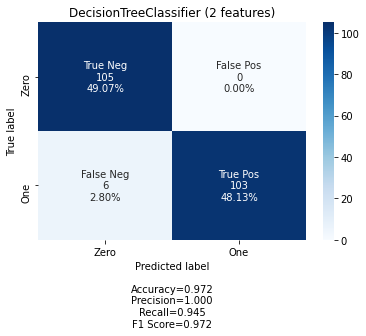

In [3]:
automl.getBestConfusionMatrix()

In [4]:
dfGroupBy_algorithm = dfResults.groupby('algorithm').mean().sort_values('f1')
dfGroupBy_algorithm

,train_time,mem_max,f1,accuracy,roc_auc
algorithm,,,,,
DecisionTreeClassifier,2.748090,192.386719,0.986047,0.986047,0.984848
KNeighborsClassifier,2.410577,192.257812,0.959973,0.957807,0.992857
LogisticRegression,2.114113,190.945312,0.895726,0.887929,0.973882
SVC,2.253568,192.058594,0.932441,0.929790,0.961513


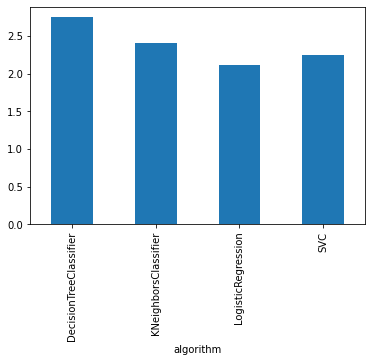

In [5]:
dfGroupBy_algorithm['train_time'].plot.bar();

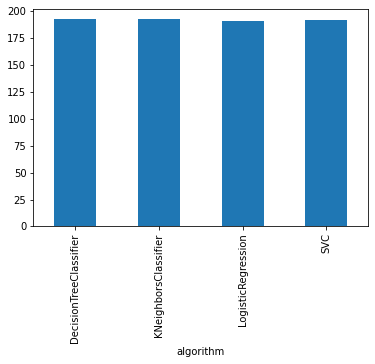

In [6]:
dfGroupBy_algorithm['mem_max'].plot.bar();

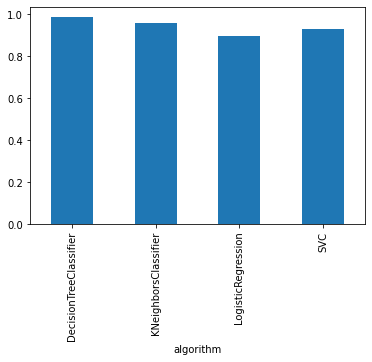

In [7]:
dfGroupBy_algorithm['f1'].plot.bar();

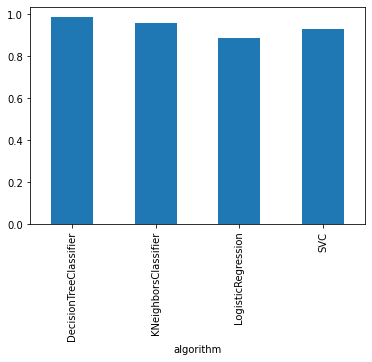

In [8]:
dfGroupBy_algorithm['accuracy'].plot.bar();

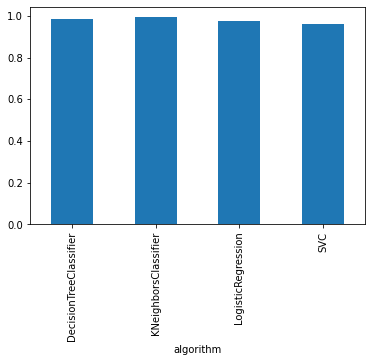

In [9]:
dfGroupBy_algorithm['roc_auc'].plot.bar();